<a href="https://colab.research.google.com/github/ClaudomiroSales/ROCandAUCinPython/blob/main/Roc_and_auc_demo_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

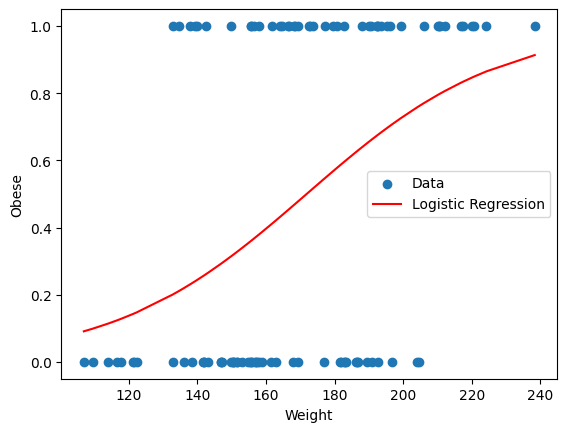

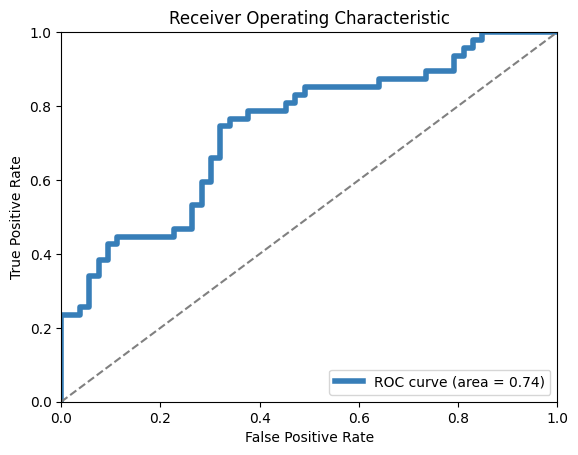

         tpp         fpp  thresholds
0   0.000000  100.000000    1.913239
1   2.127660  100.000000    0.913239
2  23.404255  100.000000    0.769899
3  23.404255   96.226415    0.757677
4  25.531915   96.226415    0.724819
           tpp        fpp  thresholds
41   95.744681  16.981132    0.219538
42   97.872340  16.981132    0.211511
43   97.872340  15.094340    0.200857
44  100.000000  15.094340    0.200572
45  100.000000   0.000000    0.091074
          tpp        fpp  thresholds
20  65.957447  69.811321    0.467158
21  65.957447  67.924528    0.465353
22  74.468085  67.924528    0.432652
23  74.468085  66.037736    0.421189
24  76.595745  66.037736    0.412588
25  76.595745  62.264151    0.385643
26  78.723404  62.264151    0.378846
27  78.723404  54.716981    0.369026
Area under the curve (AUC): 0.74


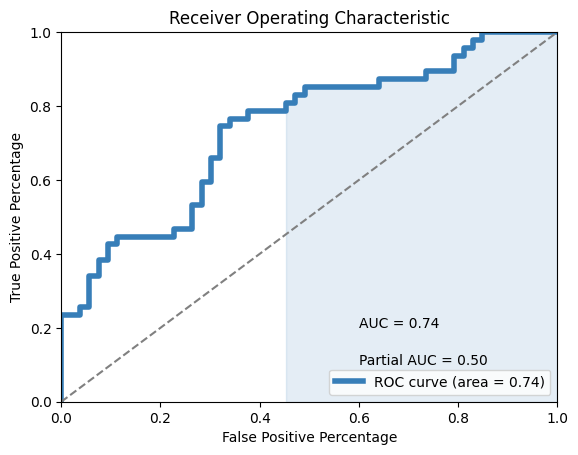

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Set the seed
random.seed(420)
np.random.seed(420)

num_samples = 100

# Generate sorted random samples
weight = np.sort(np.random.normal(loc=172, scale=29, size=num_samples))

#print(weight)

# Generate uniform random numbers
uniform_randoms = np.random.uniform(low=0.0, high=1.0, size=num_samples)

# Compute ranks
ranks = np.argsort(np.argsort(weight)) + 1

#print(ranks)

# Create 'obese' array
obese = np.where(uniform_randoms < (ranks / num_samples), 1, 0)

#print(obese)

# Plot the data
plt.scatter(weight, obese, label='Data')

# Fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(weight.reshape(-1, 1), obese)

# Get the fitted values
fitted_values = log_reg.predict_proba(weight.reshape(-1, 1))[:, 1]

# Plot the logistic regression line
plt.plot(weight, fitted_values, color='red', label='Logistic Regression')

# Add labels and legend
plt.xlabel('Weight')
plt.ylabel('Obese')
plt.legend()
plt.show()


# Compute ROC curve
fpr_log, tpr_log, thresholds = roc_curve(obese, fitted_values)


# Plot ROC curve
plt.figure()
plt.plot(fpr_log, tpr_log, color='#377eb8', lw=4, label='ROC curve (area = %0.2f)' % auc(fpr_log, tpr_log))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Create a data frame for ROC information


roc_df_log = pd.DataFrame({
    'tpp': tpr_log * 100,  # true positive percentage
    'fpp': (1 - fpr_log) * 100,  # false positive percentage
    'thresholds': thresholds
})

print(roc_df_log.head())  # Show upper right-hand corner of the ROC graph
print(roc_df_log.tail())  # Show lower left-hand corner of the ROC graph

# Filter for thresholds between TPP 60% and 80%
filtered_roc_df = roc_df_log[(roc_df_log['tpp'] > 60) & (roc_df_log['tpp'] < 80)]
print(filtered_roc_df)

# Calculate and print the AUC
roc_auc_log = auc(fpr_log, tpr_log)
print(f"Area under the curve (AUC): {roc_auc_log:.2f}")

# Plot ROC curve with additional details
plt.figure()
plt.plot(fpr_log, tpr_log, color='#377eb8', lw=4, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Percentage')
plt.ylabel('True Positive Percentage')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc_log, color='black')

# Plot partial AUC
partial_fpr, partial_tpr, _ = roc_curve(obese, fitted_values)
partial_auc = auc(partial_fpr[partial_fpr >= 0.45], partial_tpr[partial_fpr >= 0.45])

plt.fill_between(partial_fpr, 0, partial_tpr, where=(partial_fpr >= 0.45) & (partial_fpr <= 1.0), color='#377eb822')
plt.text(0.6, 0.1, 'Partial AUC = %0.2f' % partial_auc, color='black')

plt.show()


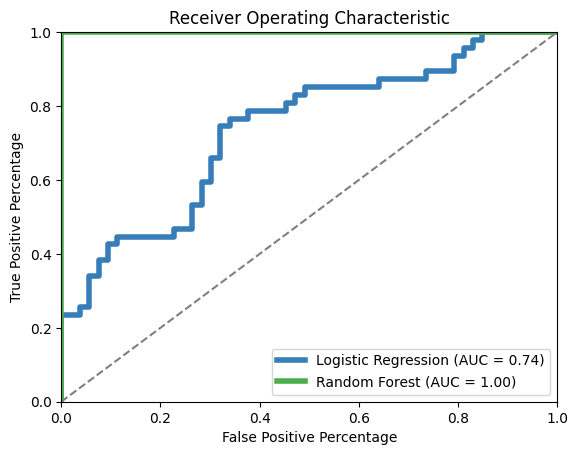

         tpp         fpp  thresholds
0   0.000000  100.000000    1.913239
1   2.127660  100.000000    0.913239
2  23.404255  100.000000    0.769899
3  23.404255   96.226415    0.757677
4  25.531915   96.226415    0.724819
           tpp        fpp  thresholds
41   95.744681  16.981132    0.219538
42   97.872340  16.981132    0.211511
43   97.872340  15.094340    0.200857
44  100.000000  15.094340    0.200572
45  100.000000   0.000000    0.091074
         tpp    fpp  thresholds
0   0.000000  100.0        2.00
1  14.893617  100.0        1.00
2  21.276596  100.0        0.99
3  29.787234  100.0        0.97
4  34.042553  100.0        0.93
      tpp        fpp  thresholds
25  100.0  50.943396        0.06
26  100.0  43.396226        0.05
27  100.0  39.622642        0.03
28  100.0  28.301887        0.02
29  100.0   0.000000        0.00
          tpp        fpp  thresholds
20  65.957447  69.811321    0.467158
21  65.957447  67.924528    0.465353
22  74.468085  67.924528    0.432652
23  74.46808

In [22]:
# Fit a random forest model
rf_model = RandomForestClassifier(random_state=420)
rf_model.fit(weight.reshape(-1, 1), obese)

# Get the votes (probabilities)
rf_probs = rf_model.predict_proba(weight.reshape(-1, 1))[:, 1]

# Compute ROC curve for random forest
fpr_rf, tpr_rf, _ = roc_curve(obese, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for logistic regression
plt.figure()
plt.plot(fpr_log, tpr_log, color='#377eb8', lw=4, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)

# Plot ROC curve for random forest
plt.plot(fpr_rf, tpr_rf, color='#4daf4a', lw=4, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Percentage')
plt.ylabel('True Positive Percentage')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(roc_df_log.head())  # Show upper right-hand corner of the ROC graph
print(roc_df_log.tail())  # Show lower left-hand corner of the ROC graph

# Create a data frame for ROC information (Random Forest)
roc_df_rf = pd.DataFrame({
    'tpp': tpr_rf * 100,  # true positive percentage
    'fpp': (1 - fpr_rf) * 100,  # false positive percentage
    'thresholds': _  # thresholds are the same for both
})

print(roc_df_rf.head())  # Show upper right-hand corner of the ROC graph
print(roc_df_rf.tail())  # Show lower left-hand corner of the ROC graph

# Filter for thresholds between TPP 60% and 80% (Logistic Regression)
filtered_roc_df_log = roc_df_log[(roc_df_log['tpp'] > 60) & (roc_df_log['tpp'] < 80)]
print(filtered_roc_df_log)

# Filter for thresholds between TPP 60% and 80% (Random Forest)
filtered_roc_df_rf = roc_df_rf[(roc_df_rf['tpp'] > 60) & (roc_df_rf['tpp'] < 80)]
print(filtered_roc_df_rf)
